In [1]:
#import necessary modules
import pip

modules = ["missingno", "pandas", "numpy", "seaborn", "matplotlib", "nltk", "wordcloud", "textblob", "sklearn", "xgboost", "gensim"]

for module in modules:
    try:
        __import__(module)
    except ImportError:
        pip.main(['install', module])

import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download("popular")
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Error loading popular: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


<h3>Exploratory Data Analysis<h3>

In [2]:
#load the dataset
df_videos = pd.read_csv("USvideos.csv", on_bad_lines='skip')
df_comments = pd.read_csv("UScomments.csv", on_bad_lines='skip')

/var/folders/s4/_s7bt8m12cs4j6d1lwvcj7_c0000gn/T/ipykernel_67167/3463021545.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv("UScomments.csv", on_bad_lines='skip')


In [3]:
df_videos.shape, df_comments.shape

((7992, 11), (691400, 4))

In [4]:
#display top 5 observations from the videos dataset
df_videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [5]:
#display top 5 observations from the videos dataset
df_comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
#identify missing values in the dataset
df_videos.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [7]:
df_comments.isna().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

<Axes: >

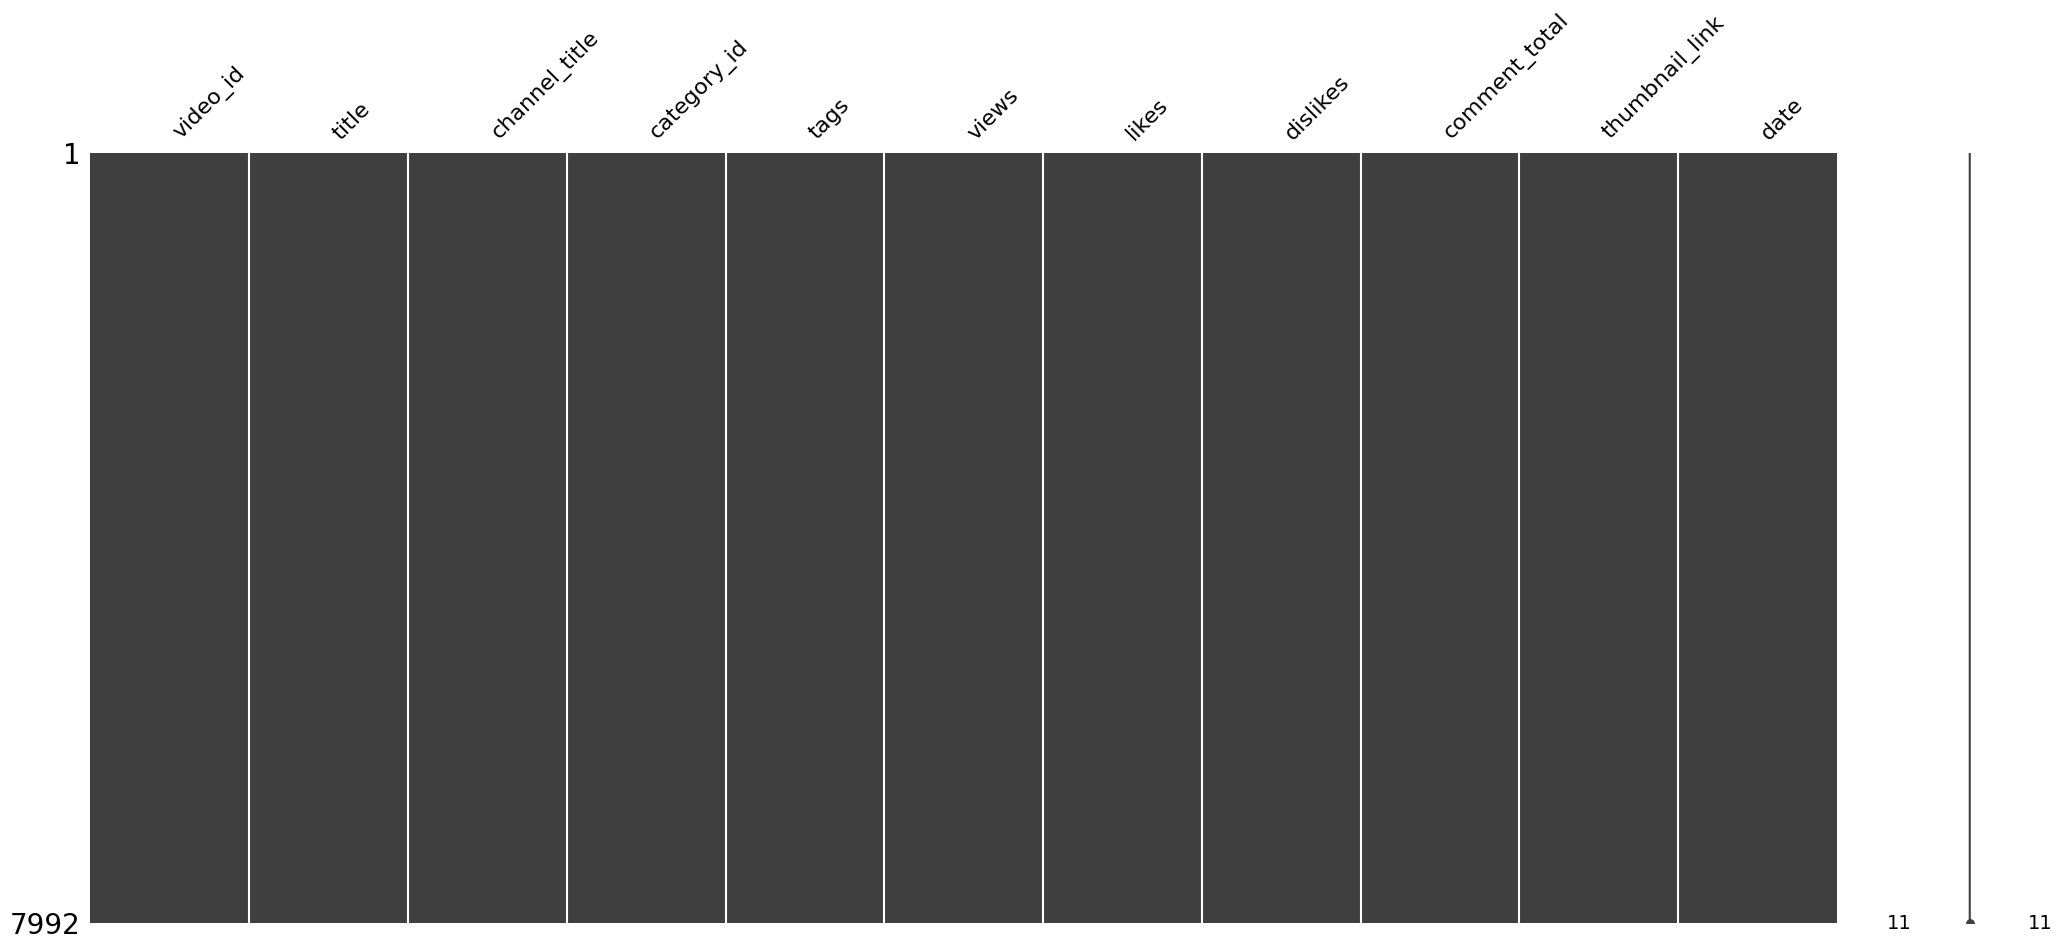

In [8]:
#plot missingness for videos dataset
msno.matrix(df_videos)

<Axes: >

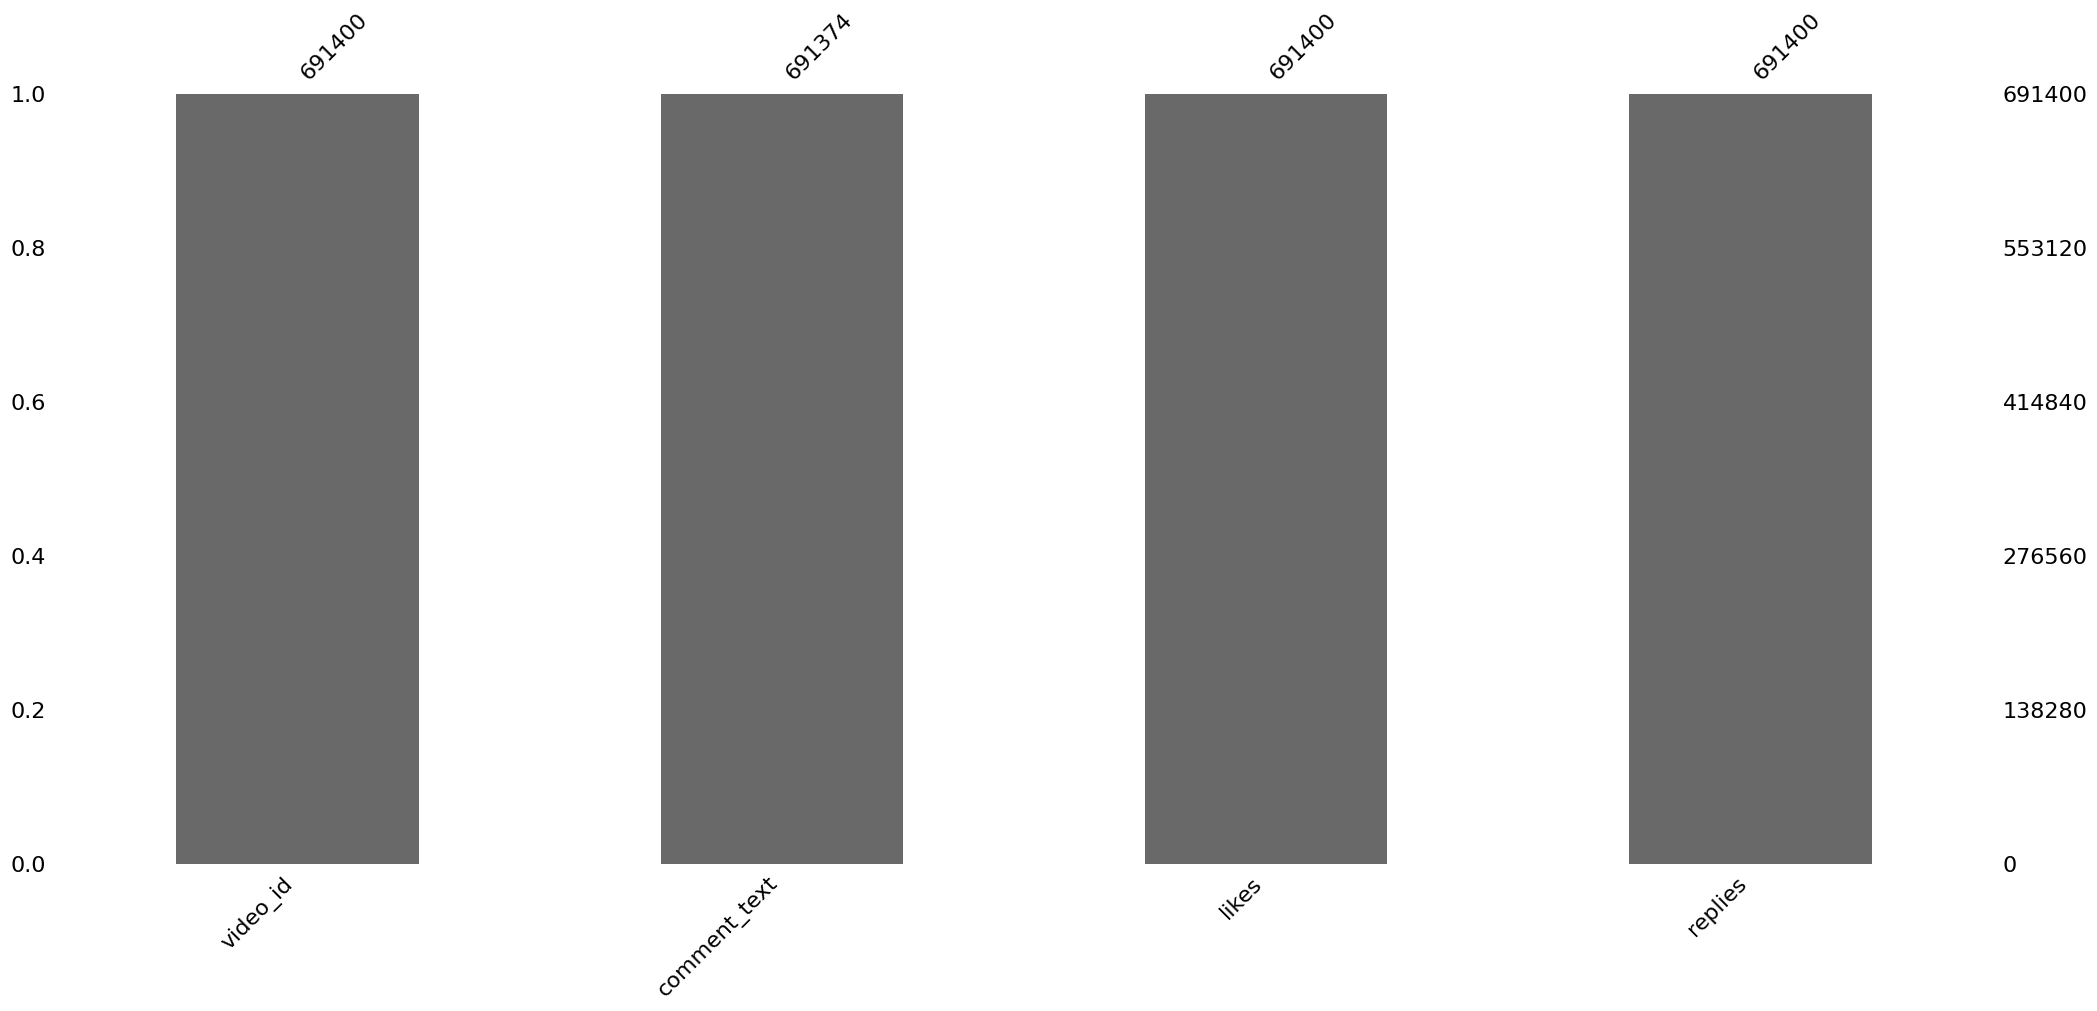

In [9]:
#plot missingness for comments dataset
msno.bar(df_comments)

In [10]:
#Drop the data with missing values in both df_videos & df_comments
df_videos.dropna(inplace=True)
df_comments.dropna(inplace=True)

In [11]:
#identify numeric and categorical columns from the dataset
categorical = []
numeric = []
for col in df_videos.columns:
    if (df_videos[col].dtype == 'int64'):
        numeric.append(col)
    else:
        categorical.append(col)

categorical, numeric

(['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link', 'date'],
 ['category_id', 'views', 'likes', 'dislikes', 'comment_total'])

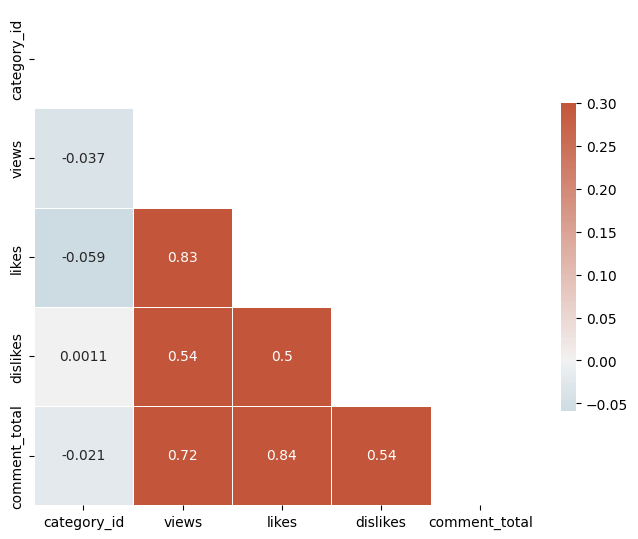

In [12]:
""" Displays a correlation matrix for a dataset """
def display_correlation_matrix(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(8, 8))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
	               square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
    
display_correlation_matrix(df_videos[numeric])

In [13]:
#summary statistics for numeric columns
df_videos[numeric].describe()

,category_id,views,likes,dislikes,comment_total
count,7992.000000,7.992000e+03,7.992000e+03,7992.000000,7992.000000
mean,20.217718,9.390269e+05,3.449193e+04,1781.625000,4608.489740
std,7.415525,2.148263e+06,9.136160e+04,10822.103125,20252.758016
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,17.000000,9.686375e+04,1.907500e+03,67.000000,286.000000
50%,23.000000,3.086115e+05,8.652500e+03,272.500000,1085.500000
75%,25.000000,9.588758e+05,3.021350e+04,1013.000000,3462.750000
max,43.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000


In [14]:
videos_top_1000_views = df_videos.nlargest(1000, 'views')
videos_top_1000_views.shape

(1000, 11)

In [15]:
#Top 10 videos with the most views
videos_top_1000_views.sort_values('views', ascending = False).head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1907,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09
1694,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,38013692,1950475,75294,713293,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,21.09
177,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,Dusk Till Dawn|Pop|RCA Records Label|ZAYN feat...,36323498,1431683,28049,100661,https://i.ytimg.com/vi/tt2k8PGm-TI/default.jpg,13.09
7135,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,982842,184310,337603,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,18.10
6917,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,32512343,968719,180427,332396,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,17.10


In [16]:
videos_top_1000_with_comments = videos_top_1000_views.merge(df_comments, how = 'left', on = 'video_id', suffixes = ['_video', '_comment'])
videos_top_1000_with_comments.head(5)

,video_id,title,channel_title,category_id,tags,views,likes_video,dislikes,comment_total,thumbnail_link,date,comment_text,likes_comment,replies
0,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,"I'm crying, this got over 20 million views <3",0,0
1,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,It's 3am here got an hour left. It's ok if we ...,0,0
2,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,......I have replayed this MV ....too much and...,0,0
3,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,fam we can break DESPACITO record if we manage...,0,0
4,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,can someone tell me the likes now?,0,0


In [17]:
sentiment = []
for comment in videos_top_1000_with_comments['comment_text']:
    try:
        sentiment.append(TextBlob(comment).sentiment.polarity)
    except:
        sentiment.append(0)

In [18]:
#input sentiment for each comment
videos_top_1000_with_comments['sentiment'] = sentiment
videos_top_1000_with_comments.head()

,video_id,title,channel_title,category_id,tags,views,likes_video,dislikes,comment_total,thumbnail_link,date,comment_text,likes_comment,replies,sentiment
0,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,"I'm crying, this got over 20 million views <3",0,0,0.400000
1,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,It's 3am here got an hour left. It's ok if we ...,0,0,0.321528
2,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,......I have replayed this MV ....too much and...,0,0,-0.212500
3,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,fam we can break DESPACITO record if we manage...,0,0,0.050000
4,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,can someone tell me the likes now?,0,0,0.000000


In [19]:
grouped_by_videos = videos_top_1000_with_comments.groupby('video_id').agg({'views' : 'mean', 'sentiment':'mean', 'likes_video' : 'mean'})
grouped_by_videos.head()

,views,sentiment,likes_video
video_id,,,
-6Zc8Co2H3w,1.913596e+06,0.230334,48933.500000
-Denciie5oA,2.351065e+06,0.058587,16457.500000
-Ifnaxi2LQg,3.230524e+06,0.097771,118856.000000
-JmNKGfFj7w,2.814971e+06,0.092961,18516.333333
-_Q5kO4YXFs,3.533483e+06,0.204491,12778.500000


<Axes: xlabel='sentiment'>

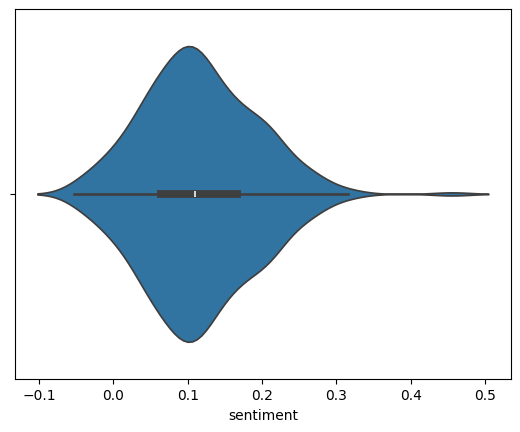

In [20]:
#violin plot to see where most of the values of the sentiment lies in
sns.violinplot(data = grouped_by_videos, x = 'sentiment')

This indicates that the average sentiment for the videos are on positive side.

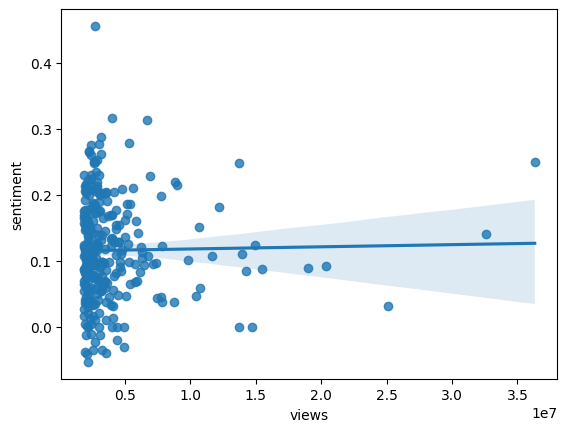

In [21]:
#identify linearity between views and sentiment
sns.regplot(data = grouped_by_videos, x = 'views', y = 'sentiment')
plt.show()

In [22]:
grouped_by_videos['views'].corr(grouped_by_videos['sentiment'])

0.017095452919875912

As the pearson correlation coefficient is 0.017, we can say that there is a weak relationship between the views and sentiment.

In [23]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [24]:
commentsTokens = []

for i in range(len(videos_top_1000_with_comments[:100])):
  comments = videos_top_1000_with_comments["comment_text"].str.strip()[i]
  comments = remove_emojis(videos_top_1000_with_comments["comment_text"].str.strip()[i])
  tokens = word_tokenize(comments)
  for token in tokens:
    commentsTokens.append(token)
    
#get distinct tokens
commentsTokens = list(dict.fromkeys(commentsTokens))
len(commentsTokens)

526

In [25]:
"""Creates a Word Cloud for @tokens, with all lowercase letters, with the font size of each word based on frequency """
def display_WordCloud(tokens, title):
    comment_words = ''
    stopwords = set(STOPWORDS)

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

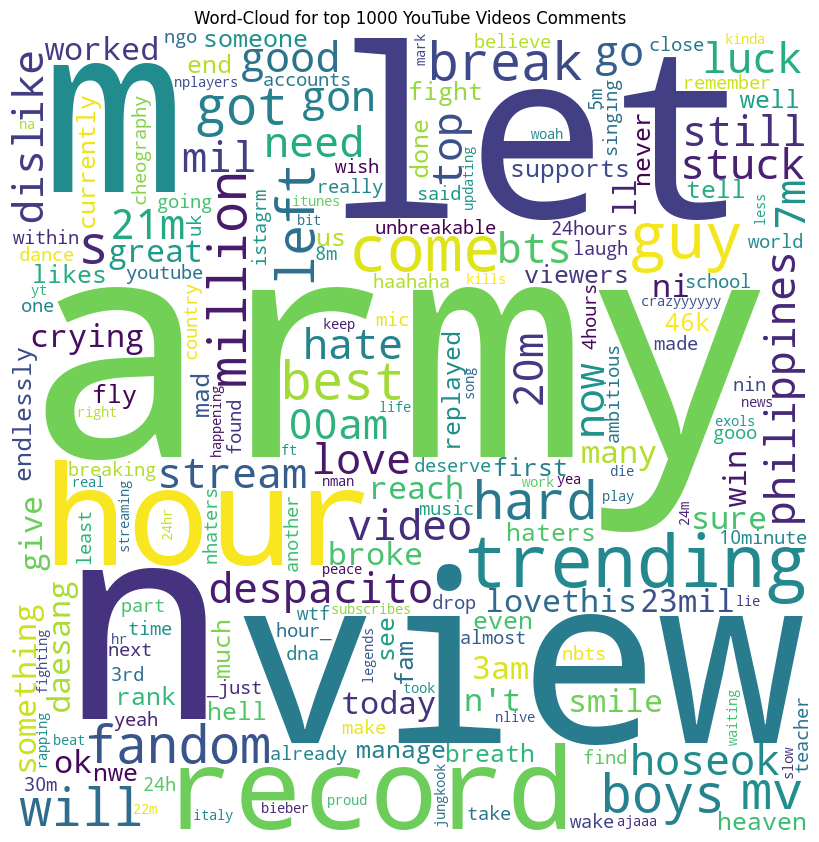

In [26]:
#word-cloud for top 1000 YouTube Video Comments
display_WordCloud(commentsTokens, 'Word-Cloud for top 1000 YouTube Videos Comments')

In [27]:
df_merged = df_videos.merge(df_comments[['video_id','comment_text']], on = ['video_id'], how = 'inner')
df_merged.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,comment_text
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,Logan Paul it's yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,I've been following you from the start of your...
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,MY FAN . attendance
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,trending 😉


In [28]:
df_merged.shape

(2940803, 12)

<h3>Categorising YouTube videos based on comments and statistics</h3>

In [29]:
import string
# Preprocess comments (replace with actual cleaning functions)
def clean_comment(text):
  text = text.lower()  # lowercase
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove non-alphanumeric characters
  return text

def txt_clean(comment_text):
    table = str.maketrans('','',string.punctuation)
    
    comment_text.replace("-"," ")
    descp = comment_text.split()
    #uppercase to lowercase
    descp = [wrd.lower() for wrd in descp]
    #remove punctuation from each token
    descp = [wrd.translate(table) for wrd in descp]
    #remove hanging 's and a
    descp = [wrd for wrd in descp if(len(wrd)>1)]
    #remove words containing numbers with them
    descp = [wrd for wrd in descp if(wrd.isalpha())]
    #converting back to string
    comment = ' '.join(descp)

    return comment

In [30]:
# Clean the comments, remove stop words, emojis from the comments
from gensim.parsing.preprocessing import remove_stopwords

df_merged['comment_text'] = df_merged['comment_text'].apply(txt_clean)
df_merged['comment_text'] = df_merged['comment_text'].apply(remove_stopwords)
df_merged['comment_text'] = df_merged['comment_text'].apply(remove_emojis)

In [31]:
df_merged.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,comment_text
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,logan paul yo big day
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,ive following start vine channel seen vlogs
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,hi kong maverick
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,fan attendance
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,trending


In [32]:
#Tokenize the comments
df_merged['tokenized_comments'] = df_merged['comment_text'].apply(word_tokenize)

In [33]:
# count of tokenized comments
from collections import Counter

freq = Counter([item for sublist in df_merged['tokenized_comments'].to_list() for item in sublist])
freq

Counter({'like': 279640,
         'love': 249319,
         'im': 157181,
         'video': 156062,
         'people': 122964,
         'dont': 118801,
         'good': 108862,
         'know': 96760,
         'song': 90177,
         'time': 78224,
         'think': 76461,
         'great': 71544,
         'look': 66348,
         'got': 65908,
         'lol': 65337,
         'want': 64515,
         'best': 63116,
         'looks': 58894,
         'way': 58116,
         'amazing': 55979,
         'need': 54976,
         'going': 53482,
         'new': 53453,
         'thats': 50796,
         'guys': 48925,
         'videos': 48805,
         'better': 48276,
         'man': 46823,
         'watch': 45843,
         'music': 45404,
         'trending': 44997,
         'life': 44744,
         'god': 44430,
         'na': 43976,
         'right': 43832,
         'shit': 43141,
         'youre': 42787,
         'beautiful': 42435,
         'movie': 41484,
         'didnt': 39706,
         'fuc

In [34]:
#display top 5 rows after tokenization
df_merged.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,comment_text,tokenized_comments
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,logan paul yo big day,"[logan, paul, yo, big, day]"
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,ive following start vine channel seen vlogs,"[ive, following, start, vine, channel, seen, v..."
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,hi kong maverick,"[hi, kong, maverick]"
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,fan attendance,"[fan, attendance]"
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,trending,[trending]


<h3>Feature Extraction</h3>

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

def do_nothing(tokens):
    return tokens

count_vect = CountVectorizer(ngram_range=(1, 1), lowercase = False, preprocessor = None, tokenizer = do_nothing)
comment_features = count_vect.fit_transform(df_merged['tokenized_comments'])
comment_features.shape

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2940803, 180897)

In [36]:
# import gensim.downloader

# glove_vectors = gensim.downloader.load('glove-twitter-25')

# glove_vectors['cat']

In [37]:
# embedded_features = []
# try:
#     for comment in df_merged['tokenized_comments']:
#         embedded_features.append(glove_vectors[comment])
# except KeyError as k:
#     print(k)
# df_merged['embedded_features'] = glove_vectors[df_merged['tokenized_comments']]

<h3>Train and test the model</h3>

In [38]:
# Define input features and output variables
X = comment_features
y = df_merged['category_id']

In [39]:
# import numpy as np
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Standardize the Data
# scaler = StandardScaler(with_mean=False)
# X_std = scaler.fit_transform(X)

# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# X_svd = svd.fit_transform(X_std)

# # Plot Explained Variance Ratio
# explained_var_ratio = svd.explained_variance_ratio_
# cumulative_var_ratio = np.cumsum(explained_var_ratio)

# plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Explained Variance Ratio vs. Number of Principal Components')
# plt.show()

In [40]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(comment_features, df_merged['category_id'], test_size = 0.2)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [41]:
# from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
# param_grid = {'C': [0.1, 1],  
#               'gamma': [1, 0.1], 
#               'kernel': ['rbf']}  

# # param_grid = { 
# #     'n_estimators': [200, 500],
# #     'max_features': ['auto', 'sqrt', 'log2'],
# #     'max_depth' : [4,5,6,7,8],
# #     'criterion' :['gini', 'entropy']
# # }

# model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# model = RandomForestClassifier(n_estimators=300, max_depth=10, max_features='log2', random_state=42)
# model = LogisticRegression(C = 0.001, max_iter=10000)
# model = SVC(C=0.1, gamma=0.1, kernel='rbf')
# model = MultinomialNB(alpha=0.5, fit_prior=True)
# model.fit(X_train, y_train)
# print(model.best_params_)
# y_pred = model.predict(X_test)
# score = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test, average='weighted')
# recall = recall_score(y_pred, y_test, average='weighted')
# print('Accuracy = {:0.2f}%'.format(score * 100))
# print('Precision = {:0.2f}%'.format(precision * 100))
# print('Recall = {:0.2f}%'.format(recall * 100))

In [41]:
from functools import reduce
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def _get_model_name(model):
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name

def train_models(X, y, models_list, cv = 5, scoring_list = None):
    mean_score = list()
    ldf = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        model.fit(X, y)
                
        for metric in scoring_list:        
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
        tmp = pd.DataFrame({name: mean_score}, index = scoring_list)
        ldf.append(tmp)
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
    return frame_scores

def plot_cv_score(frame_scores, cmap):
    fig, ax  = plt.subplots(1,1, figsize = (8,5))

    frame_scores.plot.bar(ax = ax, cmap = cmap, edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_title("Cross validation model benchmark")
    plt.xticks(rotation = 0)

In [42]:
#train multiple classification models and obtain the accuracy scores
rf = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='log2', criterion='gini', random_state=42)
log_reg = LogisticRegression(C = 0.001, max_iter=1000)
nb = MultinomialNB(alpha = 0.5, fit_prior = True)
svc = SVC(C=0.1, gamma=0.1, kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=3)

ml_models = [rf, log_reg, nb]

accuracy_scores = []
precision_scores = []
recall_scores = []

#split the dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

#Specify feature and target variables
X = comment_features
y = df_merged['category_id']

#split the dataset using k-fold stratification
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# scores = train_models(X = X_train, y = y_train, models_list = ml_models, cv = 5)
for model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_pred, y_test, average='weighted')
    precision_scores.append(precision)
    recall = recall_score(y_pred, y_test, average='weighted')
    recall_scores.append(recall)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(accuracy_scores)
print(precision_scores)
print(recall_scores)

[0.20271823901039207, 0.35574287413531214, 0.5896883196108815]
[0.9992834789907462, 0.6566505955881797, 0.6095245861296896]
[0.20271823901039207, 0.35574287413531214, 0.5896883196108815]


In [44]:
scores = pd.DataFrame({'Accuracy':accuracy_scores,
                       'Precision': precision_scores,
                       'Recall': recall_scores}, index=["RandomForestClassifier", "LogisticRegression", "MultinomialNB"])

scores

,Accuracy,Precision,Recall
RandomForestClassifier,0.202718,0.999283,0.202718
LogisticRegression,0.355743,0.656651,0.355743
MultinomialNB,0.589688,0.609525,0.589688


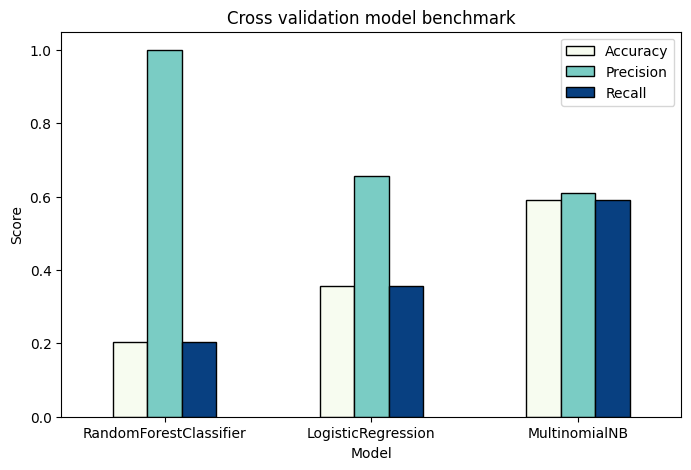

In [45]:
plot_cv_score(scores, 'GnBu')

In [ ]:
# from keras.layers import LSTM, Dropout, Dense, Input, Embedding, add
# from keras import Model
# from keras.utils import plot_model

# def define_model(vocab_size, max_length):
#     # features from the CNN model compressed from 2048 to 256 nodes
#     inputs1 = Input(shape=(2048,))
#     fe1 = Dropout(0.5)(inputs1)
#     fe2 = Dense(256, activation='relu')(fe1)

#     # LSTM sequence model
#     inputs2 = Input(shape=(max_length,))
#     se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
#     se2 = Dropout(0.5)(se1)
#     se3 = LSTM(256)(se2)

#     # Merging both models
#     decoder1 = add([fe2, se3])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(vocab_size, activation='softmax')(decoder2)

#     # merge it [image, seq] [word]
#     model = Model(inputs=[inputs1, inputs2], outputs=outputs)
#     model.compile(optimizer='adam', loss='categorical_crossentropy')

#     # summarize model
#     print(model.summary())
#     plot_model(model, to_file='model.png', show_shapes=True)

#     return model

In [38]:
# def predict_category(comments):
#   new_comment_features = count_vect.transform(comments)
#   return model.predict(new_comment_features)[0]

In [ ]:
# new_comments = ""
# predicted_category = predict_category(new_comments)
# print(f"Predicted Category: {predicted_category}")